In [ ]:
import numpy as np

from data.echosounder_data.load_data.get_echograms import get_echograms, count_classes_in_echograms
# You can select a specific year or use 'all' to include multiple years.
years = 2014  
minimum_shape = 224
tuple_frequencies = (18, 38, 70, 120, 200, 333)
echograms = get_echograms(years=years, tuple_frequencies=tuple_frequencies, minimum_shape=minimum_shape) 
print(f"Number of echograms: {len(echograms)}")


In [ ]:
e = echograms[0]
e.shape

In [ ]:
from data.echosounder_data.preprocessing.normalization import db, clip, standardize_min_max
data_transforms = [db,clip, standardize_min_max]
data = e.data_numpy_transformed(data_transforms=data_transforms, frequencies_of_interest=tuple_frequencies)
#data_transforms_2 = [clip]
#data_transforms_3 = [ standardize_min_max]
#data_2 = e.data_numpy_transformed(data_transforms=data_transforms_2, frequencies_of_interest=tuple_frequencies)
#data_3 = e.data_numpy_transformed(data_transforms=data_transforms_3, frequencies_of_interest=tuple_frequencies)

In [ ]:
data.__len__()

In [ ]:
data.shape

In [ ]:
for i in range(6):
    d = data[:, :, i]
    d2 = d[10:, :]
    #print(i, d.min(), d.max())
    print(i, d2.min(), d2.max())


    
    

In [ ]:
import matplotlib.pyplot as plt  
import os   
path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
rows_to_remove = 10

for i in range(6):
    trimmed_data = data[rows_to_remove:, :, i]
    plt.figure(figsize=(19*2, 5*2))
    plt.imshow(trimmed_data, vmin=trimmed_data.min(), vmax=trimmed_data.max())
    plt.tight_layout()
    plt.savefig(os.path.join(path, "echo_%d_filtered.jpg" % i))
    plt.close()

In [ ]:
"""

import matplotlib.pyplot as plt  
import os   
path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
rows_to_remove = 10

for i in range(6):
    trimmed_data = data_2[rows_to_remove:, :, i]
    plt.figure(figsize=(18*2, 5*2))
    plt.imshow(trimmed_data, vmin=trimmed_data.min(), vmax=trimmed_data.max())
    plt.tight_layout()
    plt.savefig(os.path.join(path, "echo_%d_filtered_clip.jpg" % i))
    plt.close()
"""

In [ ]:
"""
import matplotlib.pyplot as plt  
import os   
path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
rows_to_remove = 10

for i in range(6):
    trimmed_data = data_3[rows_to_remove:, :, i]
    plt.figure(figsize=(18*2, 5*2))
    plt.imshow(trimmed_data, vmin=trimmed_data.min(), vmax=trimmed_data.max())
    plt.tight_layout()
    plt.savefig(os.path.join(path, "echo_%d_filtered_standardize.jpg" % i))
    plt.close()
"""    

In [ ]:
'''
from adaptation_method.pca.pca import PCAonGPU, rescale_each_channel_for_visualization
from data.echosounder_data.preprocessing.resize_and_crop import SplitResizeEchogram
import numpy as np
import matplotlib.pyplot as plt
from data.echosounder_data.preprocessing.normalization import db, clip, standardize_min_max

data_transforms = [db]
data_transforms_2 = [standardize_min_max,db]
data_transforms_3 = [db,standardize_min_max]
data_transforms_4 = [db,clip, standardize_min_max]
e = echograms[0]
mask = e.select_mask()

data = e.data_numpy_transformed(data_transforms=data_transforms, frequencies_of_interest=tuple_frequencies)
data_2 = e.data_numpy_transformed(data_transforms= data_transforms_2, frequencies_of_interest=tuple_frequencies)
data_3 = e.data_numpy_transformed(data_transforms= data_transforms_3, frequencies_of_interest=tuple_frequencies)
data_4 = e.data_numpy_transformed(data_transforms= data_transforms_4, frequencies_of_interest=tuple_frequencies)
print(data.shape)

data_rgb_tensor, pca = PCAonGPU(data, mask, n_components= 3, normalize=True, device=None)
data_rgb_tensor_2, pca_2 = PCAonGPU(data_2, mask, n_components= 3, normalize=True, device=None)
data_rgb_tensor_3, pca_3 = PCAonGPU(data_3, mask, n_components= 3, normalize=True, device=None)
data_rgb_tensor_4, pca_4 = PCAonGPU(data_4, mask, n_components= 3, normalize=True, device=None)

rescaling = rescale_each_channel_for_visualization(data_rgb_tensor)
rescaling_2 = rescale_each_channel_for_visualization(data_rgb_tensor_2)
rescaling_3 = rescale_each_channel_for_visualization(data_rgb_tensor_3)
rescaling_4 = rescale_each_channel_for_visualization(data_rgb_tensor_4)
print(rescaling.numpy().shape)
print(rescaling_2.numpy().shape)
print(rescaling_3.numpy().shape)
print(rescaling_4.numpy().shape)


path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data = rescaling[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_filtered_%d.jpg" % i))
    plt.close()

path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data_2 = rescaling_2[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data_2)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_filtered_2_%d.jpg" % i))
    plt.close()
    
path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data_3 = rescaling_3[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data_3)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_filtered_3_%d.jpg" % i))
    plt.close()



path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data_4 = rescaling_4[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data_4)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_filtered_4_%d.jpg" % i))
    plt.close()
'''


In [ ]:
"""
for i in range(3):
    print(data_rgb_tensor_4[:,:,i].min(), data_rgb_tensor_4[:,:,i].max())
"""

In [ ]:
"""
for i, (d, d2, d3) in enumerate(zip(data.transpose(2, 0, 1), data_2.transpose(2, 0, 1), data_3.transpose(2, 0, 1))):
    print(i, d.min(), d2.min(), d3.min()) # db, std and db, db and std
    print(i, d.max(), d2.max(), d3.max())
"""

In [ ]:
10*np.log10(100.2)

In [ ]:
"""
path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data_2 = rescaling_2[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data_2)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_%d_filtered_2.jpg" % i))
    plt.close()
"""

In [1]:
import numpy as np
from data.echosounder_data.load_data.get_echograms import get_echograms, count_classes_in_echograms
# You can select a specific year or use 'all' to include multiple years.
years = 2014  
minimum_shape = 224
tuple_frequencies = (18, 38, 70, 120, 200, 333)
echograms = get_echograms(years=years, tuple_frequencies=tuple_frequencies, minimum_shape=minimum_shape) 
print(f"Number of echograms: {len(echograms)}")

Number of echograms: 1


In [15]:
from adaptation_method.Autoencoder import ResNetAutoEncoder, Autoencoder
import torch
import torch.nn as nn
from data.echosounder_data.preprocessing.normalization import db, clip, standardize_min_max
from torch.utils.data import DataLoader, TensorDataset


#Takes the first element from the echogram data 
e = echograms[0]

#Normalizing the data
data_transforms = [db,clip, standardize_min_max]
data = e.data_numpy_transformed(data_transforms=data_transforms, frequencies_of_interest=tuple_frequencies)
print(data.shape) #original Shape

#Transposing to (C, H, W)
data_transpose = data.transpose(2,0,1)
print(data_transpose.shape)

#Converting to torch tensor
data = torch.tensor(data_transpose)
data_unsqueezed = data.unsqueeze(0) #Shape (1,C,H,W)
for i in range(data_unsqueezed.shape[1]):
    print(i, 'min:', data_unsqueezed.min(), 'max:', data_unsqueezed.max())

#print(data_unsqueezed.shape)

#dataset = TensorDataset(data)

#Creating DataLoader with batch_size =1 for testing
dataloader = DataLoader(data_unsqueezed, batch_size= 1, shuffle= True)





(459, 1931, 6)
(6, 459, 1931)
0 min: tensor(4.5776e-07) max: tensor(1.)
1 min: tensor(4.5776e-07) max: tensor(1.)
2 min: tensor(4.5776e-07) max: tensor(1.)
3 min: tensor(4.5776e-07) max: tensor(1.)
4 min: tensor(4.5776e-07) max: tensor(1.)
5 min: tensor(4.5776e-07) max: tensor(1.)


Epoch 1/50: 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]


Epoch 1/50, Loss: 0.0656


Epoch 2/50: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


Epoch 2/50, Loss: 0.0649


Epoch 3/50: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Epoch 3/50, Loss: 0.0646


Epoch 4/50: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Epoch 4/50, Loss: 0.0643


Epoch 5/50: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Epoch 5/50, Loss: 0.0646


Epoch 6/50: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Epoch 6/50, Loss: 0.0651


Epoch 7/50: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Epoch 7/50, Loss: 0.0651


Epoch 8/50: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]


Epoch 8/50, Loss: 0.0649


Epoch 9/50: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


Epoch 9/50, Loss: 0.0643


Epoch 10/50: 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]


Epoch 10/50, Loss: 0.0647


Epoch 11/50: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Epoch 11/50, Loss: 0.0641


Epoch 12/50: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Epoch 12/50, Loss: 0.0639


Epoch 13/50: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Epoch 13/50, Loss: 0.0645


Epoch 14/50: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Epoch 14/50, Loss: 0.0638


Epoch 15/50: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


Epoch 15/50, Loss: 0.0633


Epoch 16/50: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


Epoch 16/50, Loss: 0.0632


Epoch 17/50: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


Epoch 17/50, Loss: 0.0635


Epoch 18/50: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Epoch 18/50, Loss: 0.0630


Epoch 19/50: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Epoch 19/50, Loss: 0.0640


Epoch 20/50: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


Epoch 20/50, Loss: 0.0629


Epoch 21/50: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]


Epoch 21/50, Loss: 0.0628


Epoch 22/50: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


Epoch 22/50, Loss: 0.0638


Epoch 23/50: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


Epoch 23/50, Loss: 0.0629


Epoch 24/50: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


Epoch 24/50, Loss: 0.0625


Epoch 25/50: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


Epoch 25/50, Loss: 0.0624


Epoch 26/50: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


Epoch 26/50, Loss: 0.0627


Epoch 27/50: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Epoch 27/50, Loss: 0.0634


Epoch 28/50: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Epoch 28/50, Loss: 0.0623


Epoch 29/50: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Epoch 29/50, Loss: 0.0624


Epoch 30/50: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]


Epoch 30/50, Loss: 0.0621


Epoch 31/50: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Epoch 31/50, Loss: 0.0630


Epoch 32/50: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Epoch 32/50, Loss: 0.0621


Epoch 33/50: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


Epoch 33/50, Loss: 0.0618


Epoch 34/50: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


Epoch 34/50, Loss: 0.0617


Epoch 35/50: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Epoch 35/50, Loss: 0.0617


Epoch 36/50: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Epoch 36/50, Loss: 0.0618


Epoch 37/50: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Epoch 37/50, Loss: 0.0626


Epoch 38/50: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Epoch 38/50, Loss: 0.0617


Epoch 39/50: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Epoch 39/50, Loss: 0.0612


Epoch 40/50: 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


Epoch 40/50, Loss: 0.0615


Epoch 41/50: 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


Epoch 41/50, Loss: 0.0610


Epoch 42/50: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Epoch 42/50, Loss: 0.0612


Epoch 43/50: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Epoch 43/50, Loss: 0.0619


Epoch 44/50: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Epoch 44/50, Loss: 0.0607


Epoch 45/50: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


Epoch 45/50, Loss: 0.0611


Epoch 46/50: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Epoch 46/50, Loss: 0.0606


Epoch 47/50: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


Epoch 47/50, Loss: 0.0608


Epoch 48/50: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Epoch 48/50, Loss: 0.0604


Epoch 49/50: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]


Epoch 49/50, Loss: 0.0607


Epoch 50/50: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Epoch 50/50, Loss: 0.0602
torch.Size([459, 1931, 3])
(459, 1931, 3)


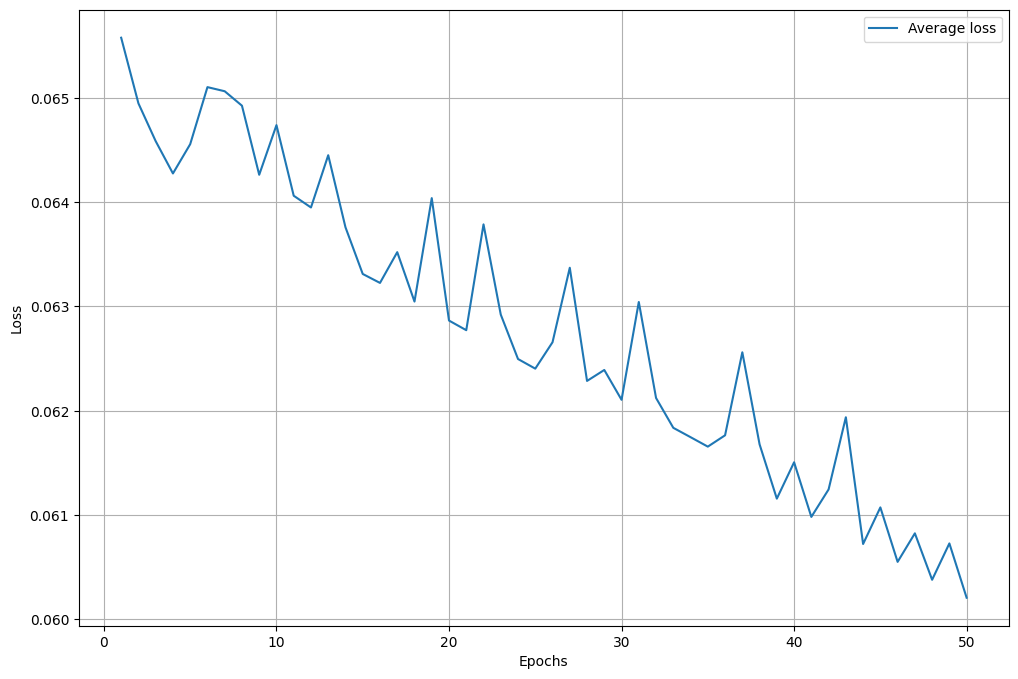

In [18]:
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm 
import torch.nn.functional as F
from pytorch_msssim import ssim

#Setting weights for MSE and SSIM loss terms

alpha = 0.8
beta = 0.0

#Instantiating model
model = Autoencoder()

# Defining Loss function and optimizer
Loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-5)
num_epochs = 50
def Train_encoder(model, optimizer, Loss_func, num_epochs):
#Training loop 
    avr_loss = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for  batch in tqdm(dataloader,desc=f'Epoch {epoch+1}/{num_epochs}'):

            inputs = batch[0].unsqueeze(0)
            optimizer.zero_grad()
            
            #forward pass
            outputs, encoded = model(inputs)
            
            #computing reconstruction loss (Comparing outputs with inputs)
            mse_loss = Loss_func(outputs, inputs)
            #computing SSIM Loss
            ssim_loss = 1 - ssim(outputs, inputs, data_range = inputs.max()-inputs.min(), size_average = True)
            
            #Combining losses as a weighted sum
            loss = alpha * mse_loss + beta * ssim_loss
            
            #Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            #Accumulating loss for logging
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        avr_loss.append(avg_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')
        
    return encoded, avr_loss

encoder, avr_loss = Train_encoder(model, optimizer, Loss_func, num_epochs)

encode = encoder.squeeze(0)
encoded_transpose = encode.permute(1,2,0)
print(encoded_transpose.shape)

encoder = encoded_transpose.detach().numpy()
print(encoder.shape)

plt.figure(figsize=(12, 8))
plt.plot(range(1, num_epochs+1), avr_loss, label = 'Average loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
 

In [19]:
for i in range(encoder.shape[2]):
    print(i, encoder.min(), encoder.max())

0 0.00013528853 0.9992662
1 0.00013528853 0.9992662
2 0.00013528853 0.9992662


In [94]:
from adaptation_method.Autoencoder import ResNetAutoEncoder, Autoencoder
import torch
import torch.nn as nn
from data.echosounder_data.preprocessing.normalization import db, clip, standardize_min_max
from torch.utils.data import DataLoader, TensorDataset


#Takes the first element from the echogram data 
e = echograms[0]

#Normalizing the data
data_transforms = [db,clip, standardize_min_max]
data = e.data_numpy_transformed(data_transforms=data_transforms, frequencies_of_interest=tuple_frequencies)
print(data.shape) #original Shape

#Transposing to (C, H, W)
data_transpose = data.transpose(2,0,1)
print(data_transpose.shape)

#Converting to torch tensor
data = torch.tensor(data_transpose)
data_unsqueezed = data.unsqueeze(0) #Shape (1,C,H,W)
for i in range(data_unsqueezed.shape[1]):
    print(f"{i},", 'min:', data_unsqueezed.min(), 'max:', data_unsqueezed.max())

#Creating DataLoader with batch_size =1 for testing
dataloader_2 = DataLoader(data_unsqueezed, batch_size= 1, shuffle= True)

(459, 1931, 6)
(6, 459, 1931)
0, min: tensor(4.5776e-07) max: tensor(1.)
1, min: tensor(4.5776e-07) max: tensor(1.)
2, min: tensor(4.5776e-07) max: tensor(1.)
3, min: tensor(4.5776e-07) max: tensor(1.)
4, min: tensor(4.5776e-07) max: tensor(1.)
5, min: tensor(4.5776e-07) max: tensor(1.)


In [ ]:
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm 
import torch.nn.functional as F

#Instantiating model
model = ResNetAutoEncoder()

# Defining Loss function and optimizer
Loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
num_epochs = 10
def Train_encoder(model, optimizer, Loss_func, num_epochs, dataloader):
#Training loop 
    avr_loss = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for  batch in tqdm(dataloader,desc=f'Epoch {epoch+1}/{num_epochs}'):

            inputs = batch[0].unsqueeze(0)
            optimizer.zero_grad()
            
            #forward pass
            outputs, encoded = model(inputs)
            
            #computing reconstruction loss (Comparing outputs with inputs)
            loss= Loss_func(outputs, inputs)
            
            #Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            #Accumulating loss for logging
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        avr_loss.append(avg_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')
        
    return encoded, avr_loss

encoded, avr_loss = Train_encoder(model, optimizer, Loss_func, num_epochs, dataloader_2)

encode = encoded.squeeze(0)
encoded_transpose = encode.permute(1,2,0)
encoded = encoded_transpose.detach().numpy()
print(encoded.shape)


plt.figure(figsize=(12, 8))
plt.plot(range(1, num_epochs+1), avr_loss, label = 'Average loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
 

Epoch 1/10:   0%|          | 0/1 [00:00<?, ?it/s]


ValueError: expected 4D input (got 3D input)

In [93]:
print(encoded.shape)
for i in range(encoded.shape[2]):
    print(i, encoded.min(), encoded.max())

(459, 1931, 3)
0 0.0 4.1603284
1 0.0 4.1603284
2 0.0 4.1603284


In [ ]:
import os

path = "/Users/shado/Documents/Master Thesis/INFORM_marine-main/Visualizations"
for i in range(3):
    trimmed_data = encoded[10:, :, i]
    plt.figure(figsize=(24*2, 24*2))
    plt.imshow(trimmed_data)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "rgb_%d.jpg" % i))
    plt.close()
    

In [ ]:
from data.echosounder_data.preprocessing.resize_and_crop import SplitResizeEchogram

split_patch_size = 224  # Patch size used to define vertical guideline in the original echogram.
output_patch_size = 224  # Final patch size after resizing.
split_and_resize = SplitResizeEchogram()

echo_idx = 0
cropped_full_view = False  # Set to True to output the full cropped echogram view for visualization.
# Apply the SplitResizeEchogram process to generate the label, data, and mask patches.
label_data_mask = split_and_resize(
    echogram=echograms[echo_idx], 
    split_patch_size=split_patch_size, 
    output_patch_size=output_patch_size,
    data_transforms=data_transforms,
    cropped_full_view=cropped_full_view
)
